# Linear Regression - English Premier League

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy

In this notebook, I will be exploring a small dataset of football players to produce a simple linear regression model. The target variable is the players score (

## Load data

In [2]:
df = pd.read_csv('EPL_Soccer_MLR_LR.csv')
df.head(2)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30


## Exploratory analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [4]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [5]:
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


Score is most strongly correlated with Cost. Lets plot them to see if it looks like a linear relationship.

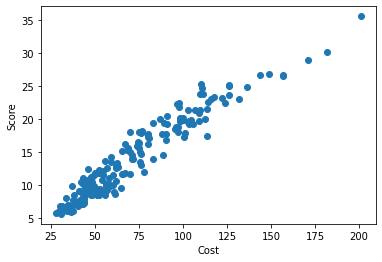

In [6]:
plt.scatter(df['Cost'], df['Score'])
plt.xlabel('Cost')
plt.ylabel('Score');

There is a strong linear association between Cost and Score! 

## Train test split

To model this relationship using a simple linear regression, we need to separate out X (Cost of the player) and y (Score of the player). 

We also need to do a train test split to avoid overfitting.

In [7]:
# separate X and y
X = df['Cost']
y = df['Score']

# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [8]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (151,)
X_test shape: (51,)
y_train shape: (151,)
y_test shape: (51,)


## Simple Linear Regression

We will fit the model:
![equation](https://latex.codecogs.com/svg.image?Score&space;=&space;\beta&space;_{0}&plus;\beta&space;_{1}*Cost)

In [9]:
lr = sm.OLS(y_train, X_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                   3.84e-144
Time:                        19:07:03   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Add an intercept
X_train_with_intercept = sm.add_constant(data=X_train)
lr = sm.OLS(endog=y_train, exog=X_train_with_intercept).fit()
lr.summary()

/home/kai/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           6.91e-88
Time:                        19:07:03   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.004       0.305       1.589
Cost           0.1821      0.004     44.456      0.000       0.174       0.190
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.867
Skew:                           0.359   Prob(JB):                        0.145
Kurtosis:                       2.685   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**If we increase Cost by 1, we estimate that Score will increase by 0.1821.**

Based on the P values for both parameters, we can reject the null hypothesis. That is to say that Cost has a statistically significant impact on Score.

The R-Squared of 0.930 tells us that 93% of the variance in Score can be predicted by the variance in Cost.

## Plots and basic analysis

In [11]:
# Extract parameter estimates b0 and b1
b0 = lr.params[0]
b1 = lr.params[1]

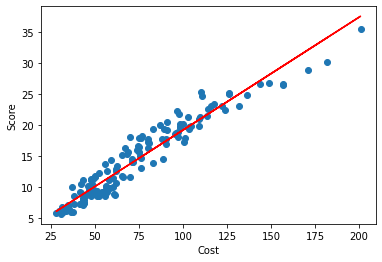

In [12]:
# Plot the fitted line on our training data
plt.scatter(X_train, y_train)
plt.plot(X_train, b0 + b1*X_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score");

The model tends to overestimate the Score of a player when the Cost increases above 150. This suggests that the Premier League is overpaying some players based on their Score. Although there are only a few data points above a Cost of 150.

We could split the data at a Cost of 150 and do fit a second model (Piecewise Linear Regression).

/home/kai/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


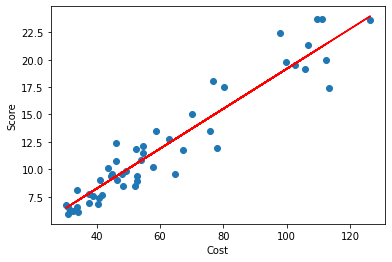

In [13]:
# Plot the fitted line on test data

# Add intercept to X_test
X_test_with_intercept = sm.add_constant(data=X_test)

# predict y fitted
y_test_fitted = lr.predict(X_test_with_intercept)

# plot
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score");

The model also seems to be doing well against the test data. 

There doesn't seem to be any sort of pattern in the residuals - i.e. we are not overestimating or estimating in general.

However, one thing to note is that the maximum Cost value in our test data is ~125, whereas in our train data the max value was ~200. And we started to see a breakdown in the models ability to predict a players Score above a Cost of 150. 

## Regression diagnostics 

### Non-linearity 

Here we are looking to see if the residuals of the model have a non-linear relationship with Cost.

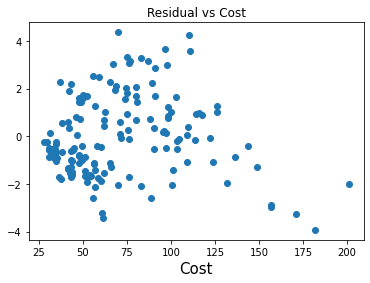

In [14]:
# get our train residuals
y_train_fitted = lr.predict(X_train_with_intercept)
r_i = (y_train - y_train_fitted) 

# Residual vs Cost plot
plt.title("Residual vs Cost")
plt.xlabel("Cost", fontsize=15)
plt.scatter(X_train, r_i);

For non-linearity, we are looking for some kind of pattern. If the errors are non-linear, we might see the residuals increasing/decreasing against cost. 

In the above plot the residuals look linear for Cost < 150. However, for Cost > 150 we can't be as confident.

We should try to get more data for players with a Cost of 150. Otherwise, we should be cautious about predicting beyond a Cost of 150.

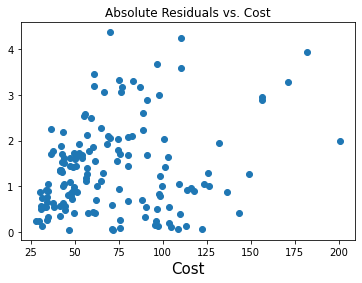

In [15]:
#Absolute residuals against predictor
abs_r_i = np.abs(y_train - y_train_fitted)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(X_train, abs_r_i)
plt.show()

### Heteroskedacity (non-constant variance)

Heteroskedacitity: The variance in our predicted variable is not the same across all values of X. If our errors are heteroskedastic, we can either:
- Transform the errors
- Use Weighted Least Squares

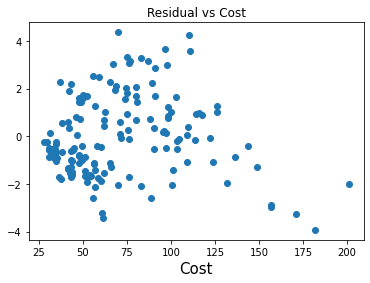

In [16]:
# Residual vs Cost plot
plt.title("Residual vs Cost")
plt.xlabel("Cost", fontsize=15)
plt.scatter(X_train, r_i);

No strong evidence of non-constant variance in the residuals.

### Deviations from normality

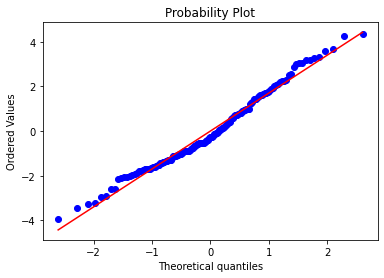

In [17]:
#Normality plot
scipy.stats.probplot(r_i,plot=plt);

Tails might be a little heavy, but overall no clear reason to reject normality expectations because the residuals lie on the line.

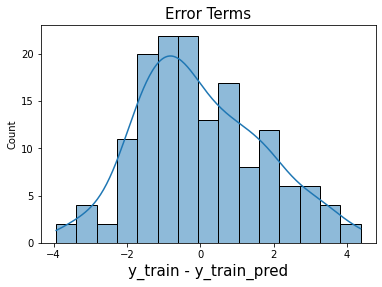

In [18]:
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values
fig = plt.figure()
sns.histplot(r_i, kde=True, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

The errors look to be approximately Normally distributed. With more data, we'd expect it to converge even more to a normal distribution

### Outliers

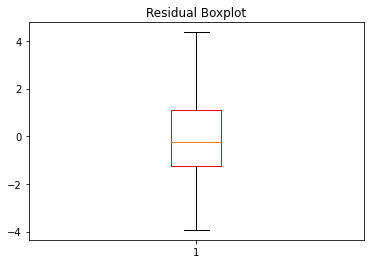

In [19]:
#Boxplot for outliers
# plot
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

There are some extreme outliers, but not that many of them. Overall, we wouldn't eliminate any values.

### Missing predictor variables

There are other variables that we are not accounting for that could have an effect on Score. For example, if we account for average distance covered, minutes to goal ratio or the club that a player plays for, then the relationship between Cost and Score might be less strong.

## Non-constant variance demo

In [20]:
#Demo of how to deal with non-constant variance through transformations

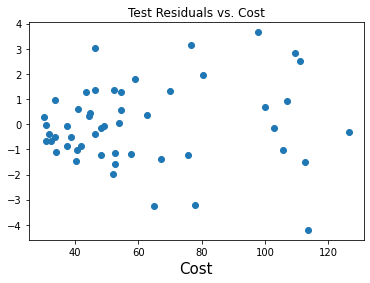

In [21]:
test_residuals = (y_test - y_test_fitted)
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(X_test, test_residuals);

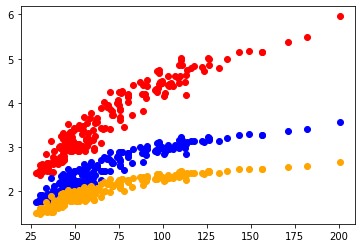

In [22]:
#Try sqrt
sqrt_y=np.sqrt(y)
plt.scatter(X, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(X, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(X, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

## Adjusting the model

Lets re-run the regression with the square root of Score as the target.

In [23]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(X, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(data=x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

/home/kai/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           9.72e-75
Time:                        19:07:12   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.000       1.864       2.071
Cost           0.0234      0.001     35.594      0.000       0.022       0.025
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.360
Skew:                           0.032   Prob(JB):                        0.507
Kurtosis:                       2.539   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const    1.967367
Cost     0.023433
dtype: float64


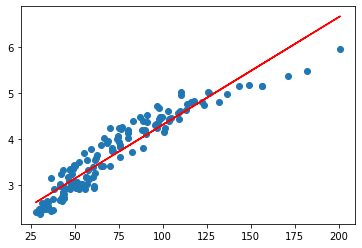

In [24]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

/home/kai/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


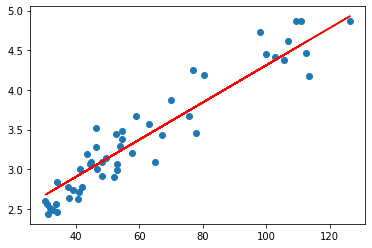

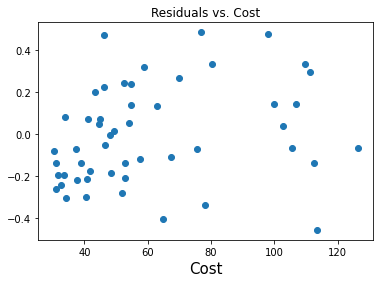

In [25]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)

#Residuals vs. predictor
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination